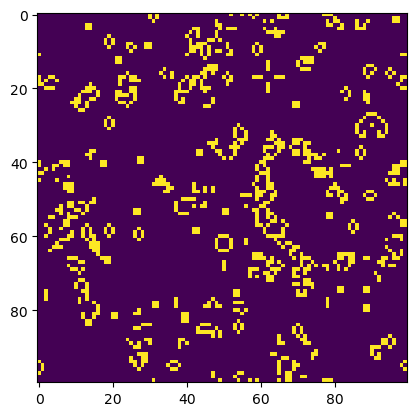

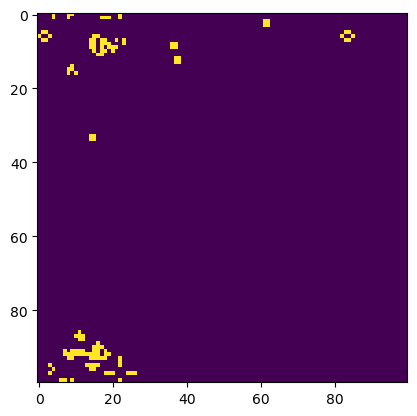

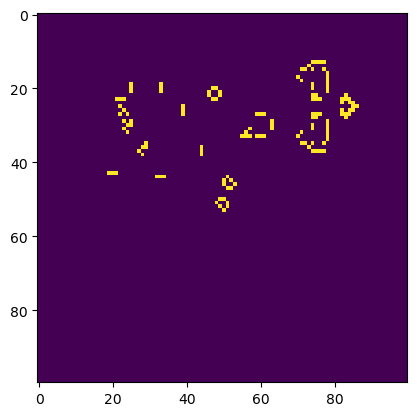

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ON = 255  # Alive cell value
OFF = 0   # Dead cell value
N = 100   # Size of the grid (N x N)

def update(frameNum, img, grid, N):
    newGrid = grid.copy()

    for i in range(N):
        for j in range(N):
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]) / 255)

            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON

    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img

def save_frame(frameNum, img, grid, N):
    plt.savefig(f'gof_frame_{frameNum:03d}.png', format='png')
    return img

# Initialize a random grid for Conway's Game of Life
grid = np.random.choice([ON, OFF], N*N, p=[0.2, 0.8]).reshape(N, N)

# Set up the plot for Conway's Game of Life
fig_gof, ax_gof = plt.subplots()
img_gof = ax_gof.imshow(grid, interpolation='nearest')

# Set up the animation for Conway's Game of Life
ani_gof = animation.FuncAnimation(fig_gof, update, fargs=(img_gof, grid, N,),
                                  frames=50, interval=100,
                                  init_func=lambda: save_frame(0, img_gof, grid, N))

# To save the animation as a GIF using Pillow
ani_gof.save('gof_animation.gif', writer='pillow', fps=5)

# Example 1: Glider Gun
gun_grid = np.zeros((N, N), dtype=int)
gun_grid[5:8, 1:3] = ON
gun_grid[3:8, 35:37] = ON
gun_grid[5:7, 11:13] = ON
gun_grid[5, 23] = ON
gun_grid[2:4, 23:25] = ON
gun_grid[7:9, 23:25] = ON
gun_grid[4:9, 24] = ON
gun_grid[2:4, 61:63] = ON
gun_grid[7:9, 61:63] = ON
gun_grid[6, 62] = ON
gun_grid[3:8, 73:75] = ON
gun_grid[5:8, 83:85] = ON

# Set up the plot for Glider Gun
fig_gun, ax_gun = plt.subplots()
img_gun = ax_gun.imshow(gun_grid, interpolation='nearest')

# Set up the animation for Glider Gun
ani_gun = animation.FuncAnimation(fig_gun, update, fargs=(img_gun, gun_grid, N,),
                                  frames=200, interval=100,
                                  init_func=lambda: save_frame(0, img_gun, gun_grid, N))

# To save the animation as a GIF using Pillow
ani_gun.save('glider_gun_animation.gif', writer='pillow', fps=5)

# Example 2: Pulsar
pulsar_grid = np.zeros((N, N), dtype=int)
pulsar_grid[22:25, 24:27] = ON
pulsar_grid[22:25, 32:35] = ON
pulsar_grid[22:25, 39:42] = ON
pulsar_grid[22:25, 47:50] = ON
pulsar_grid[30:33, 24:27] = ON
pulsar_grid[30:33, 32:35] = ON
pulsar_grid[30:33, 39:42] = ON
pulsar_grid[30:33, 47:50] = ON
pulsar_grid[35:38, 22:25] = ON
pulsar_grid[35:38, 29:32] = ON
pulsar_grid[35:38, 39:42] = ON
pulsar_grid[35:38, 46:49] = ON
pulsar_grid[42:45, 22:25] = ON
pulsar_grid[42:45, 29:32] = ON
pulsar_grid[42:45, 39:42] = ON
pulsar_grid[42:45, 46:49] = ON

# Set up the plot for Pulsar
fig_pulsar, ax_pulsar = plt.subplots()
img_pulsar = ax_pulsar.imshow(pulsar_grid, interpolation='nearest')

# Set up the animation for Pulsar
ani_pulsar = animation.FuncAnimation(fig_pulsar, update, fargs=(img_pulsar, pulsar_grid, N,),
                                     frames=200, interval=100,
                                     init_func=lambda: save_frame(0, img_pulsar, pulsar_grid, N))

# To save the animation as a GIF using Pillow
ani_pulsar.save('pulsar_animation.gif', writer='pillow', fps=5)

# Display the plots
plt.show()
